# Μετάπτωση του Spin

## Μετάπτωση Larmor

Σ αυτό το notebook θα δουμε τι συμβάνει στο spin του ηλεκτρονίου όταν εκτίθεται σε ένα ομοιογενές σταθερό μαγνητικό πεδίο. Πως εφαρμόζουμε αλλαγή βάσης, πως χειριζόμαστε ορθοκανονικές καταστάσεις και διαγωνιοποιούμε τις Χαμιλτονιανές.

Η Χαμιλτονιανή σε ένα μαγνητικό δίπολο σε ομοιογενές μαγνητικό πεδίο δίνεται από τη σχέση:
$$H=-\vec{\mu}\cdot \vec{B}$$
Το μαγνητικό δίπολο του ηλεκτρονίου δίνεται από τη σχέση:
$$ \vec{\mu} = \gamma \vec{S}$$
Οπου  $\gamma$ είναι ο γυρομαγνητικός λόγος του ηλεκτρονίου. Η ακριβής τιμή του $\gamma$ υπολογίζεται από την κβαντική θεωρία πεδίου και δίνεται κατά προσέγγιση από τη σχέση:
$$\gamma \approx 2\left( 1 + \frac{\alpha}{2\pi}\right)$$
όπου $\alpha$ είναι η σταθερά λεπτής υφής, $\alpha \approx 1/137$.  Το διάνυσμα του σπιν δίνεται από τους πίνακες Pauli,

$$ \vec{S} = \frac{\hbar}{2}\vec{\sigma}$$
Επομένως η Χαμιλτονιανή για το spin του ηλεκτρονίου σε μαγνητικό πεδίο είναι:
$$ H = -\gamma \frac{\hbar}{2}\sum_i \sigma_i B_i$$
όπου $i=x,y,z$.

Σ αυτό το notebook, υποθέτουμε ότι $\hbar=1$ and $|B|=3T$.

### Αναφορές

Larmor Precession, Griffiths, Chapter 4, page 178

Changing Bases, Griffiths, Appendix A.4

Pauli matrices, https://en.wikipedia.org/wiki/Pauli_matrices

Scipy "eigh" function, https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh





### Προγραμματίζοντας τη Χαμιλτονιανή
Φορτώνουμε της βιβλιοθήκες και θέτουμε $ | B | = 3Τ $.

In [22]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy as np
import numpy.linalg
import math

In [23]:
B=3    #  
alpha = 1./137   # Σταθερά λεπτής υφής
g = 2*(1+alpha/(2*np.pi)) # γυρομαγνητικός λόγος
hbar = 1   # Η σταθερά του Planck

#### Ερώτηση 1
Ας υποθέσουμε ότι το διάνυσμα του μαγνητικού πεδίου βρίσκεται στο επίπεδο Y-Z και ότι σχηματίζει γωνία $\theta$ με τον άξονα z.  Συμπληρώστε αυτές τις τρεις συναρτήσεις για να επιστρέψετε τους πίνακες Pauli, το διάνυσμα μαγνητικού πεδίου και τη Χαμιλτονιανή. Για να ελέγξετε την εργασία σας, βεβαιωθείτε ότι η Χαμιλτονιανή που υπολογίζεται για $ |B| = 3Τ $ και $\theta = \pi/4 $ είναι σωστή.

In [24]:
def pauli_matrices():    
    sig_x = np.matrix([ [0,1], [1,0] ])# Αλλάξτε εδώ 
    sig_y = np.matrix([ [0,-1j], [1j,0] ])# Αλλάξτε εδώ
    sig_z = np.matrix([ [1,0], [0,-1] ])# Αλλάξτε εδώ
    
    sigmas = np.array([sig_x, sig_y, sig_z])
    return sigmas

def magnetic_field(theta, B):
    return np.array([0, B*np.sin(theta), B*np.cos(theta)])  # Αλλάξτε εδώ (x,y,z)

def Hamiltonian(theta, B):
    sigmas = pauli_matrices()
    B_vector = magnetic_field(theta, B)
    H = - 0.5 * g * hbar * np.tensordot(sigmas , B_vector ,axes=np.array([0,0]))#Κατασκευάστε την Χαμιλτονιανή, Δέστε την Scipy συνάρτηση "tensordot" για να πάρετε το εσ. γινόμενο μεταξύ B και sigmas
    return H

theta_check = np.pi / 4
print("H= ",Hamiltonian(theta_check,B))
print(Hamiltonian(theta_check,B).shape)

H=  [[-2.12378471+0.j          0.        +2.12378471j]
 [-0.        -2.12378471j  2.12378471-0.j        ]]
(2, 2)


## Διαγωνιοποίηση της Hamiltonian
Οι πίνακες Pauli είναι συνήθως ως προς τη βάση $S_Z$, οπότε η παραπάνω Χαμιλτονιανή δεν θα είναι διαγώνια εάν το μαγνητικό πεδίο δεν είναι κατά μήκος του άξονα z. Προκειμένου να βρούμε τις ιδιοενέργειες και τις ιδιοκαταστάσεις για το ηλεκτρόνιο στο μαγνητικό πεδίο, μπορούμε να χρησιμοποιήσουμε την ["eigh" συνάρτηση της Scipy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh).
#### Ερώτηση 2
Χρησιμοποιήστε την "eigh" για να βρείτε τις ενέργειες και τις ιδιοκαταστάσεις για $\theta = \pi/3 $ και $ | Β | = 3Τ $.  Οι ιδιοσυναρτήσεις επιστρέφονται σε ένα πίνακα, $\Psi $, όπου κάθε στήλη είναι μια ιδιοκατάσταση. Οι ιδιοσυναρτήσεις πρέπει να είναι ορθογώνιες, έτσι ώστε $ \Psi^\dagger \Psi = Ι $.  Ελέγξτε ότι αυτό ισχύει.

In [25]:
H = Hamiltonian(np.pi/3, B)
print("H=",H,f" to shape tis hamiltonianhs{H.shape}")
(energies, eigenstates) = np.linalg.eigh(H) #Χρησιμοποιήστε την συνάρτηση numpy.linalg.eigh 
print("E=",energies,energies.shape)
print("Psi=\n",eigenstates,eigenstates.shape)
print("Psi.conj.T*Psi=\n",np.dot(eigenstates.conj().T ,eigenstates),"οπως βλεπουμε μας δινει την σωστη μοργη 2χ2 οπως και τον διαγωνιο πινακα με καμια φανταστικη τιμη") #Ελέγξτε Psi^\dagger\Psi=I; δείτε numpy.dot 

H= [[-1.50174257+0.j          0.        +2.60109444j]
 [-0.        -2.60109444j  1.50174257-0.j        ]]  to shape tis hamiltonianhs(2, 2)
E= [-3.00348514  3.00348514] (2,)
Psi=
 [[-0.8660254-0.j        -0.5      +0.j       ]
 [ 0.       -0.5j        0.       +0.8660254j]] (2, 2)
Psi.conj.T*Psi=
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]] οπως βλεπουμε μας δινει την σωστη μοργη 2χ2 οπως και τον διαγωνιο πινακα με καμια φανταστικη τιμη


Κάθε ιδιοκατάσταση υπακούει στην χρονικά ανεξάρτητη εξίσωση Schrodinger.
$$ Η \psi_i = Ε_i \psi_i $$
Σε αυτή την εξίσωση η $Ε$ είναι μια βαθμωτή τιμή.  Θα μπορούσαμε να γράψουμε αυτήν την εξίσωση για κάθε ιδιοκατάσταση, αλλά υπάρχει ένας πιο ωραίος τρόπος για να την εκφράσουμε σαν μια εξίσωση πινάκων.
$$ Η \psi = \psi Ε $$
Όπου τώρα $Ε$ είναι ένας διαγώνιος πίνακας όπου ένα στοιχείο $ Ε (i, i) $ είναι η ενέργεια της $i$ ιδιοκατάστασης. Πάνω, δείξαμε ότι $ \Psi^\dagger \Psi = Ι $, που σημαίνει ότι $ \Psi^\dagger = \Psi^{-1}$.  Επομένως
$$\Psi^{-1}H\Psi = \Psi^{\dagger}H\Psi = E$$
Έτσι ο $\Psi$ είναι ο πίνακας μετασχηματισμού της Hamiltonian!
#### Ερώτηση 3
Ελέγξτε  ότι $\psi^{\dagger} Η \psi = Ε$ μας δίνει διαγώνιο πίνακα.

In [26]:
print(f"Psi.conj.T*H*Psi Συζηγη και αναστροφο η απλα o ερμιτιανος συζηγης επι την Χαμιλτονιανη και επι την ψ\n {np.dot(np.dot(eigenstates.conj().T,H), eigenstates)}") # Εκτυπώστε το διαγώνιο πίνακα
#tsekaroume kai tis E
print(f" Enw E =\n {energies} ") 

Psi.conj.T*H*Psi Συζηγη και αναστροφο η απλα o ερμιτιανος συζηγης επι την Χαμιλτονιανη και επι την ψ
 [[-3.00348514+0.j  0.        +0.j]
 [ 0.        +0.j  3.00348514+0.j]]
 Enw E =
 [-3.00348514  3.00348514] 


## Χρόνος εξέλιξης των πιθανοτήτων
Ας υποθέσουμε ότι στο $ t = 0 $, το ηλεκτρόνιο μετράται  να έχει $ s_z = \hbar/2 $, έτσι ώστε η κατάσταση να είναι $ \chi (0) = | \uparrow>_z $. Στη βάση  z
$$\chi(0)_z = \left( \begin{array}{ccc}
1 \\
0  \end{array} \right)_z=1*|\uparrow>_z+0*|\downarrow>_z$$

Ωστόσο, θα μπορούσαμε επίσης να γράψουμε τις καταστάσεις στη βάση των ιδιοδιανυσμάτων, όπου η κατάσταση spin-up σημαίνει ότο το spin προσανατολίζεται κατά μήκος της κατεύθυνσης του μαγνητικού πεδίου, όπου
$$\chi(0)_B = \left( \begin{array}{ccc}
a \\
b  \end{array} \right)_B =a*|\uparrow>_B+b*|\downarrow>_B$$
and $a^2+b^2=1$.  


Πώς πηγαίνουμε από τη μια βάση στο άλλη;  Μετατρέπουμε  την κατάσταση με τον ίδιο πίνακα μετασχηματισμού που χρησιμοποιήσαμε για τη Hamiltonian, το πίνακα των ιδιοδιανυσμάτων.
$$ \chi(0)_B = \Psi^\dagger \chi(0)_z$$

#### Ερώτηση 4
Δεδομένου ότι $\chi(0)=|\uparrow>_z$, ποια ειναι η $ \chi (0) $ στη βάση Β αν $ \theta = \pi/5 $;


In [27]:
H = Hamiltonian(np.pi/5, B)
(energies, eigenstates) = np.linalg.eigh(H)
psi_0_zbasis = np.matrix([[1],[0]])
psi_0_Bbasis = np.dot(eigenstates.conj().T, psi_0_zbasis)#ποια είναι η \chi(0)_B?
print("chi(0)_z=\n",psi_0_zbasis)
print("chi(0)_B=\n",psi_0_Bbasis)

chi(0)_z=
 [[1]
 [0]]
chi(0)_B=
 [[-0.95105652+0.j]
 [-0.30901699+0.j]]


Τώρα που έχουμε την αρχική κατάσταση στη βάση Β, τη βάση των ιδιοκαταστάσεων, μπορούμε εύκολα να βρούμε την εξέλιξη της κατάστασης.
$$\chi(t)_B = \left( \begin{array}{ccc}
a*e^{-iE_\uparrow t/\hbar} \\
b*e^{-iE_\downarrow t/\hbar}  \end{array} \right)_B =a*e^{-iE_\uparrow t/\hbar}|\uparrow>_B+b*e^{-iE_\downarrow t/\hbar}|\downarrow>_B$$
και $a^2+b^2=1$.  

#### Ερώτηση 5
Γράψτε μια συνάρτηση για να υπολογίσετε το $\chi (t)_b $ από το $\chi(0)_B$, τις ιδιοενέργειες και το χρόνο.  Εκτυπώστε το $\chi(t = 5)_B$ για $\theta = \pi/3 $.

In [28]:
H = Hamiltonian(np.pi/3, B)
(energies, eigenstates) = np.linalg.eigh(H)
psi_0_zbasis = np.matrix([[1],[0]])
psi_0_Bbasis = np.dot(eigenstates.conj().T, psi_0_zbasis) # ϊδιος κώδικας με πάνω

def get_psi_t_Bbasis(energies, psi_0_Bbasis, time):
    psi_t_Bbasis = np.matrix(np.zeros_like(psi_0_Bbasis))
    for i in range(0, len(energies)):
        psi_t_Bbasis[i,0] = psi_0_Bbasis[i,0] * np.exp(-1j * energies[i] * time/hbar) #Ποιο είναι το \chi(t)_B?
    return psi_t_Bbasis

print(H)
print("chi(t=5)_B=\n",get_psi_t_Bbasis(energies, psi_0_Bbasis, 5))

[[-1.50174257+0.j          0.        +2.60109444j]
 [-0.        -2.60109444j  1.50174257-0.j        ]]
chi(t=5)_B=
 [[0.66762222-0.55161633j]
 [0.38545187+0.31847583j]]


Η πιθανότητα στο χρόνο $ t $  της μέτρηση του ηλεκτρονίου να έχει spin up στην κατεύθυνση z είναι
$$ P(S_z=\hbar/2, t) = |<\chi(0)_B|\chi(t)_B>|^2$$
#### Ερώτηση 6
Κάντε ένα γράφημα $P(S_z=\hbar/2, t)$ για $t=0...3$ και για  $\theta = \pi/2, \pi/4, \pi/6$.

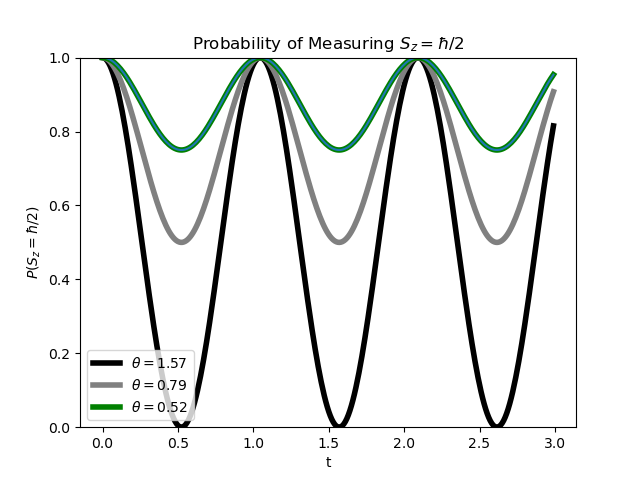

In [36]:
t = np.arange(0,3,0.01)
thetas = [np.pi/2, np.pi/4, np.pi/6]
colors = ['black','gray','green']

plt.figure()
for k in range(0, len(thetas)):
    theta = thetas[k]
    (energies, eigenstates) = np.linalg.eigh( Hamiltonian(theta, B) )
    prob_sz_up = np.zeros_like(t)
    psi_0_zbasis = np.matrix([[1],[0]])
    psi_0_Bbasis = np.dot( eigenstates.conj().T, psi_0_zbasis )
    for i in range(0, len(t)):
        psi_t_Bbasis = get_psi_t_Bbasis(energies, psi_0_Bbasis, t[i])
        overlap = np.dot(psi_0_Bbasis.conj().T, psi_t_Bbasis)[0,0]           # Συμπλη΄ρωστε τα κενά
        prob_sz_up[i] = (np.conjugate(overlap)*overlap).real # Συμπληρώστε τα κενά
    plt.plot(t, prob_sz_up, color=colors[k], lw=4, label=r'$\theta=$'+str("%.2f" %theta))
    

plt.plot(t, prob_sz_up)
plt.xlabel("t")
plt.ylabel(r"$P(S_z=\hbar/2)$")
plt.title(r"Probability of Measuring $S_z=\hbar/2$")
plt.legend()
plt.ylim([0,1])
plt.savefig("ProbSzUp_Solution_ASTERIS.png")
plt.show()